In [1]:
!pip install mediapipe opencv-python pandas scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import mediapipe as mp
import cv2 

In [3]:
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic 

# 1. Demo

In [6]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Tạo Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        results = holistic.process(image)
        
        
        # Đổi màu hình ảnh trở lại BGR để hiển thị
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # vẽ cáclandmarks trên khuôn mặt
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                                  mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
                                  )
                        
        cv2.imshow('Webcam', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [7]:
results.face_landmarks.landmark[0].visibility

0.0

#Trích xuất Landmarks & thu thập Data xuất sang CSV

In [8]:
import csv
import os
import numpy as np

In [9]:
#tính tổng số lượng điểm đánh dấu 
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
num_coords

501

In [10]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [11]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [86]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [89]:
class_name = "drowsy"

In [4]:
cap = cv2.VideoCapture(0)


with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Tạo Detections
        results = holistic.process(image)
        
        # Đổi màu hình ảnh trở lại BGR để hiển thị
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1.vẽ landmarks trên khuôn mặt
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Tay phải
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Tay trái
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4.Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Trích xuất các mốc của Pose
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # trích xuất cá landmarkskhuôn mặt
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # nối các điểm 
            row = pose_row+face_row
            
            # thêm tên class
            row.insert(0, class_name)
            
            # xuất ra file CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# 3. Train và Custom Model ( Scikit Learn)

## 3.1 Đọc Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('coords.csv')

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 2005 columns):
 #     Column  Dtype  
---    ------  -----  
 0     class   object 
 1     x1      float64
 2     y1      float64
 3     z1      float64
 4     v1      float64
 5     x2      float64
 6     y2      float64
 7     z2      float64
 8     v2      float64
 9     x3      float64
 10    y3      float64
 11    z3      float64
 12    v3      float64
 13    x4      float64
 14    y4      float64
 15    z4      float64
 16    v4      float64
 17    x5      float64
 18    y5      float64
 19    z5      float64
 20    v5      float64
 21    x6      float64
 22    y6      float64
 23    z6      float64
 24    v6      float64
 25    x7      float64
 26    y7      float64
 27    z7      float64
 28    v7      float64
 29    x8      float64
 30    y8      float64
 31    z8      float64
 32    v8      float64
 33    x9      float64
 34    y9      float64
 35    z9      float64
 36    v9      floa

In [4]:
df.head()

class        x1        y1        z1        v1        x2        y2  \
0  awake  0.535857  0.492004 -0.698590  0.999994  0.562553  0.436595   
1  awake  0.532051  0.490809 -0.693235  0.999994  0.557914  0.434713   
2  awake  0.530248  0.489291 -0.695138  0.999993  0.556529  0.432969   
3  awake  0.527232  0.486178 -0.680305  0.999992  0.554080  0.431200   
4  awake  0.527118  0.484881 -0.681555  0.999991  0.553800  0.430438   

         z2        v2        x3  ...      z499  v499      x500      y500  \
0 -0.657823  0.999983  0.575249  ... -0.003401   0.0  0.589024  0.427998   
1 -0.649451  0.999982  0.571797  ... -0.002915   0.0  0.589188  0.430985   
2 -0.650836  0.999980  0.570826  ... -0.002711   0.0  0.588118  0.428231   
3 -0.637520  0.999977  0.569059  ... -0.002711   0.0  0.590883  0.430649   
4 -0.638194  0.999974  0.568780  ... -0.002462   0.0  0.588655  0.429353   

       z500  v500      x501      y501      z501  v501  
0  0.012161   0.0  0.593525  0.423356  0.012258   0.0  
1  0.012662   0.0  0.594072  0.425942  0.012775   0.0  
2  0.011547   0.0  0.592817  0.423458  0.011557   0.0  
3  0.012711   0.0  0.595746  0.425641  0.012804   0.0  
4  0.012684   0.0  0.593336  0.424863  0.012747   0.0  

[5 rows x 2005 columns]

In [5]:
df.tail()

class        x1        y1        z1        v1        x2        y2  \
882  drowsy  0.452427  0.609961 -0.695956  0.999794  0.477903  0.542295   
883  drowsy  0.443482  0.608337 -0.728542  0.999813  0.470412  0.540577   
884  drowsy  0.437647  0.603356 -0.716621  0.999829  0.463940  0.535792   
885  drowsy  0.434656  0.599249 -0.699945  0.999844  0.459758  0.532431   
886  drowsy  0.434476  0.600580 -0.711056  0.999857  0.461272  0.533680   

           z2        v2        x3  ...      z499  v499      x500      y500  \
882 -0.672310  0.999549  0.494809  ... -0.020766   0.0  0.507306  0.537787   
883 -0.706869  0.999589  0.487396  ... -0.019624   0.0  0.503827  0.536509   
884 -0.694137  0.999624  0.481281  ... -0.019916   0.0  0.501353  0.534614   
885 -0.679919  0.999656  0.477168  ... -0.019931   0.0  0.501166  0.533987   
886 -0.683665  0.999684  0.479115  ... -0.020457   0.0  0.503102  0.534236   

         z500  v500      x501      y501      z501  v501  
882 -0.013555   0.0  0.511671  0.532731 -0.014551   0.0  
883 -0.011592   0.0  0.508277  0.531423 -0.012471   0.0  
884 -0.012244   0.0  0.505758  0.529751 -0.013220   0.0  
885 -0.011919   0.0  0.505527  0.529244 -0.012869   0.0  
886 -0.012174   0.0  0.507321  0.529679 -0.013112   0.0  

[5 rows x 2005 columns]

In [6]:
df[df['class']=='drowsy']

class        x1        y1        z1        v1        x2        y2  \
452  drowsy  0.494417  0.560619 -0.817510  0.999968  0.523042  0.499325   
453  drowsy  0.495926  0.562670 -0.784508  0.999963  0.524195  0.499822   
454  drowsy  0.497922  0.562537 -0.786721  0.999959  0.525247  0.498997   
455  drowsy  0.498126  0.562373 -0.779409  0.999956  0.525421  0.498180   
456  drowsy  0.497610  0.562367 -0.748732  0.999953  0.525312  0.497891   
..      ...       ...       ...       ...       ...       ...       ...   
882  drowsy  0.452427  0.609961 -0.695956  0.999794  0.477903  0.542295   
883  drowsy  0.443482  0.608337 -0.728542  0.999813  0.470412  0.540577   
884  drowsy  0.437647  0.603356 -0.716621  0.999829  0.463940  0.535792   
885  drowsy  0.434656  0.599249 -0.699945  0.999844  0.459758  0.532431   
886  drowsy  0.434476  0.600580 -0.711056  0.999857  0.461272  0.533680   

           z2        v2        x3  ...      z499  v499      x500      y500  \
452 -0.777019  0.999915  0.539341  ... -0.014769   0.0  0.572442  0.503778   
453 -0.748912  0.999898  0.540543  ... -0.014462   0.0  0.571606  0.503853   
454 -0.750546  0.999888  0.541743  ... -0.015367   0.0  0.571751  0.503844   
455 -0.744797  0.999881  0.542194  ... -0.015445   0.0  0.571441  0.502564   
456 -0.717059  0.999872  0.542152  ... -0.014536   0.0  0.571518  0.501984   
..        ...       ...       ...  ...       ...   ...       ...       ...   
882 -0.672310  0.999549  0.494809  ... -0.020766   0.0  0.507306  0.537787   
883 -0.706869  0.999589  0.487396  ... -0.019624   0.0  0.503827  0.536509   
884 -0.694137  0.999624  0.481281  ... -0.019916   0.0  0.501353  0.534614   
885 -0.679919  0.999656  0.477168  ... -0.019931   0.0  0.501166  0.533987   
886 -0.683665  0.999684  0.479115  ... -0.020457   0.0  0.503102  0.534236   

         z500  v500      x501      y501      z501  v501  
452  0.002896   0.0  0.576814  0.499333  0.002743   0.0  
453  0.001987   0.0  0.576137  0.499210  0.001751   0.0  
454  0.001078   0.0  0.576361  0.498741  0.000859   0.0  
455  0.001203   0.0  0.575872  0.498268  0.001016   0.0  
456  0.001739   0.0  0.575995  0.497170  0.001595   0.0  
..        ...   ...       ...       ...       ...   ...  
882 -0.013555   0.0  0.511671  0.532731 -0.014551   0.0  
883 -0.011592   0.0  0.508277  0.531423 -0.012471   0.0  
884 -0.012244   0.0  0.505758  0.529751 -0.013220   0.0  
885 -0.011919   0.0  0.505527  0.529244 -0.012869   0.0  
886 -0.012174   0.0  0.507321  0.529679 -0.013112   0.0  

[435 rows x 2005 columns]

In [7]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [9]:
y_test

643    drowsy
285     awake
867    drowsy
241     awake
685    drowsy
        ...  
652    drowsy
63      awake
28      awake
266     awake
678    drowsy
Name: class, Length: 267, dtype: object

## 3.2 Train  Model

In [10]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [11]:
pipelines = {
    'Ridge Classifier': make_pipeline(StandardScaler(), RidgeClassifierCV()),
    'Random Forest Classifier': make_pipeline(StandardScaler(), RandomForestClassifier())
}

In [12]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [13]:
fit_models

{'Ridge Classifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifiercv',
                  RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])))]),
 'Random Forest Classifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())])}

In [25]:
fit_models['Ridge Classifier'].predict(X_test)

array(['drowsy', 'awake', 'drowsy', 'awake', 'drowsy', 'drowsy', 'drowsy',
       'drowsy', 'drowsy', 'awake', 'awake', 'drowsy', 'drowsy', 'drowsy',
       'drowsy', 'awake', 'awake', 'awake', 'drowsy', 'awake', 'drowsy',
       'awake', 'awake', 'awake', 'awake', 'drowsy', 'drowsy', 'awake',
       'awake', 'awake', 'awake', 'awake', 'awake', 'drowsy', 'drowsy',
       'drowsy', 'drowsy', 'drowsy', 'awake', 'drowsy', 'drowsy',
       'drowsy', 'awake', 'drowsy', 'drowsy', 'awake', 'awake', 'awake',
       'drowsy', 'drowsy', 'drowsy', 'drowsy', 'awake', 'awake', 'drowsy',
       'drowsy', 'awake', 'awake', 'awake', 'drowsy', 'drowsy', 'drowsy',
       'awake', 'awake', 'awake', 'drowsy', 'drowsy', 'awake', 'drowsy',
       'drowsy', 'drowsy', 'drowsy', 'awake', 'awake', 'awake', 'drowsy',
       'awake', 'awake', 'awake', 'awake', 'drowsy', 'awake', 'awake',
       'awake', 'awake', 'drowsy', 'awake', 'drowsy', 'awake', 'awake',
       'awake', 'drowsy', 'drowsy', 'awake', 'awake', '

## 3.3 Đánh giá và tuần tự hóa Model

In [14]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [15]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

Ridge Classifier 1.0
Random Forest Classifier 0.9962546816479401


Learning curve for Ridge Classifier:


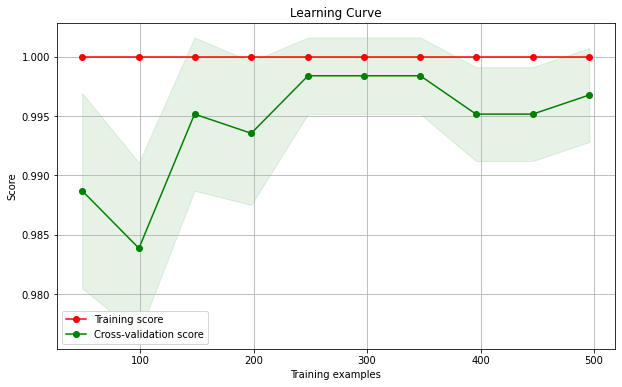

Learning curve for Random Forest Classifier:


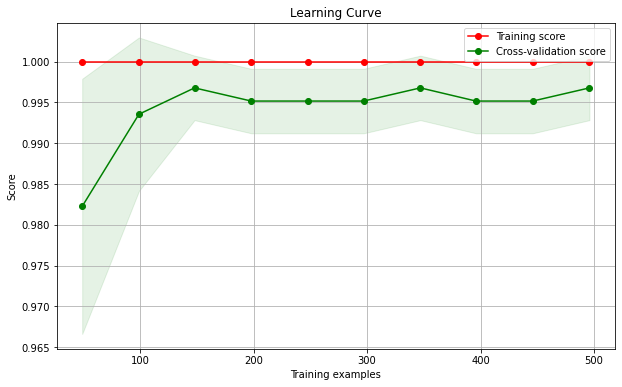

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.grid(True)
    plt.show()

# Vẽ learning curve cho từng mô hình trong fit_models
for algo, model in fit_models.items():
    print(f"Learning curve for {algo}:")
    plot_learning_curve(model, X_train, y_train)

In [18]:
from sklearn.metrics import accuracy_score

# Xuất thông báo về độ chính xác của từng thuật toán
for algo, model in fit_models.items():
    # Dự đoán trên tập kiểm thử
    y_pred = model.predict(X_test)
    
    # Tính độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    
    # Xuất thông báo
    print(f"Accuracy of {algo}: {accuracy}")

Accuracy of Ridge Classifier: 1.0
Accuracy of Random Forest Classifier: 0.9962546816479401


In [19]:
fit_models['Random Forest Classifier'].predict(X_test)

array(['drowsy', 'awake', 'drowsy', 'awake', 'drowsy', 'drowsy', 'drowsy',
       'drowsy', 'drowsy', 'awake', 'awake', 'drowsy', 'drowsy', 'drowsy',
       'drowsy', 'awake', 'awake', 'awake', 'drowsy', 'awake', 'drowsy',
       'awake', 'awake', 'awake', 'awake', 'drowsy', 'drowsy', 'awake',
       'awake', 'awake', 'awake', 'awake', 'awake', 'drowsy', 'drowsy',
       'drowsy', 'drowsy', 'drowsy', 'awake', 'drowsy', 'drowsy',
       'drowsy', 'awake', 'drowsy', 'drowsy', 'awake', 'awake', 'awake',
       'drowsy', 'drowsy', 'drowsy', 'drowsy', 'awake', 'awake', 'drowsy',
       'drowsy', 'awake', 'awake', 'awake', 'drowsy', 'drowsy', 'drowsy',
       'awake', 'awake', 'awake', 'drowsy', 'drowsy', 'awake', 'drowsy',
       'drowsy', 'drowsy', 'drowsy', 'awake', 'awake', 'awake', 'drowsy',
       'awake', 'awake', 'awake', 'awake', 'drowsy', 'awake', 'awake',
       'awake', 'awake', 'drowsy', 'awake', 'drowsy', 'awake', 'awake',
       'awake', 'drowsy', 'drowsy', 'awake', 'awake', '

In [20]:
y_test

643    drowsy
285     awake
867    drowsy
241     awake
685    drowsy
        ...  
652    drowsy
63      awake
28      awake
266     awake
678    drowsy
Name: class, Length: 267, dtype: object

In [29]:
#Lưu model
with open('drowsiness.pkl', 'wb') as f:
    pickle.dump(fit_models['Random Forest Classifier'], f)

# 4. Xây dựng mô hình với Model

In [21]:
with open('drowsiness.pkl', 'rb') as f:
    model = pickle.load(f)

In [22]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [115]:
!pip install simpleaudio 


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import simpleaudio as sa
import cv2
from IPython.display import Audio
import os

current_dir = os.getcwd()
audio_path = os.path.join(current_dir, "beep.mp3")

In [38]:
from IPython.display import Audio, display

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Tạo Detections
        results = holistic.process(image)
        
        
        # Đổi màu hình ảnh trở lại BGR để hiển thị
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # vẽ landmarks khuôn mặt
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # Xuất tọa độ
        try:
            # xuất Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # xuất các landmarks trên mặt
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # nối các rows
            row = pose_row+face_row
            
            #Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            

            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
           
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Hiển thị Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Hiện thị xác suất
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            if body_language_class == 'drowsy':
                print("Playing audio...")
                display(Audio(audio_path, autoplay=True))
            elif body_language_class == 'awake':
                print("Stopping audio...")
                Audio(audio_path).stop()
        except:
            pass
                        
        cv2.imshow('Webcam', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
drowsy [0.06 0.94]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


awake [0.68 0.32]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
drowsy [0.21 0.79]
Playing audio...


drowsy [0.07 0.93]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.49 0.51]
Playing audio...


awake [0.78 0.22]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping a

drowsy [0. 1.]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.08 0.92]
Playing audio...


drowsy [0.16 0.84]
Playing audio...


drowsy [0.38 0.62]
Playing audio...


awake [0.65 0.35]
Stopping audio...
awake [0.62 0.38]
Stopping audio...
awake [0.6 0.4]
Stopping audio...
awake [0.58 0.42]
Stopping audio...
awake [0.6 0.4]
Stopping audio...
awake [0.59 0.41]
Stopping audio...
awake [0.61 0.39]
Stopping audio...
awake [0.54 0.46]
Stopping audio...
awake [0.54 0.46]
Stopping audio...
drowsy [0.36 0.64]
Playing audio...


drowsy [0.39 0.61]
Playing audio...


drowsy [0.3 0.7]
Playing audio...


drowsy [0.08 0.92]
Playing audio...


drowsy [0.05 0.95]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.06 0.94]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.05 0.95]
Playing audio...


drowsy [0.07 0.93]
Playing audio...


drowsy [0.08 0.92]
Playing audio...


drowsy [0.1 0.9]
Playing audio...


drowsy [0.08 0.92]
Playing audio...


drowsy [0.09 0.91]
Playing audio...


drowsy [0.49 0.51]
Playing audio...


awake [0.67 0.33]
Stopping audio...
awake [0.65 0.35]
Stopping audio...
awake [0.65 0.35]
Stopping audio...
awake [0.7 0.3]
Stopping audio...
awake [0.68 0.32]
Stopping audio...
awake [0.69 0.31]
Stopping audio...
awake [0.67 0.33]
Stopping audio...
awake [0.68 0.32]
Stopping audio...
drowsy [0.08 0.92]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.71 0.29]
Stopping audio...
drowsy [0.07 0.93]
Playing audio...


drowsy [0.05 0.95]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.04 0.96]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.07 0.93]
Playing audio...


awake [0.75 0.25]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.78 0.22]
Stopping audio...
awake [0.79 0.21]
Stopping audio...
awake [0.82 0.18]
Stopping audio...
awake [0.88 0.12]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.91 0.09]
Stopping audio...
awake [0.91 0.09]
Stopping audio...
awake [0.81 0.19]
Stopping audio...
drowsy [0.05 0.95]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0. 1.]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0.02 0.98]
Playing audio...


drowsy [0.39 0.61]
Playing audio...


awake [0.74 0.26]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.78 0.22]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.81 0.19]
Stopping audio...
awake [0.8 0.2]
Stopping audio...
awake [0.79 0.21]
Stopping audio...
awake [0.72 0.28]
Stopping audio...
drowsy [0.08 0.92]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


awake [0.73 0.27]
Stopping audio...
awake [0.8 0.2]
Stopping audio...
awake [0.8 0.2]
Stopping audio...
awake [0.8 0.2]
Stopping audio...
awake [0.8 0.2]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
drowsy [0.46 0.54]
Playing audio...


drowsy [0.05 0.95]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.01 0.99]
Playing audio...


drowsy [0.03 0.97]
Playing audio...


drowsy [0.4 0.6]
Playing audio...


awake [0.79 0.21]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.74 0.26]
Stopping audio...
awake [0.78 0.22]
Stopping audio...
awake [0.79 0.21]
Stopping audio...
awake [0.81 0.19]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.92 0.08]
Stopping audio...
awake [0.92 0.08]
Stopping audio...
awake [0.91 0.09]
Stopping audio...
awake [0.91 0.09]
Stopping audio...
awake [0.9 0.1]
Stopping audio...
drowsy [0.48 0.52]
Playing audio...


drowsy [0.47 0.53]
Playing audio...


awake [0.59 0.41]
Stopping audio...
awake [0.85 0.15]
Stopping audio...
awake [0.81 0.19]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [1. 0.]
Stopping audio...
awake [0.94 0.06]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.82 0.18]
Stopping audio...
awake [0.83 0.17]
Stopping audio...
awake [0.85 0.15]
Stopping audio...
awake [0.83 0.17]
Stopping audio...
awake [0.84 0.16]
Stopping audio...
awake [0.84 0.16]
Stopping audio...
awake [0.88 0.12]
Stopping audio...
awake [0.85 0.15]
Stopping audio...
awake [0.87 0.13]
Stopping audio...
awake [0.87 0.13]
Stopping audio...
awake [0.87 0.13]
Stopping audio...
awake [0.85 0.15]
Stopping audio...
awake [0.83 0.17]
Stopping audio...
awake [0.84 0.16]
Stopping audio...
awake [0.86 0.14]
Stopping audio...
awake [0.92 0.08]
Stopping audio...
awake [0.95 0.05]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.94 0.06]
Stopping audio...
awake [0.92 0.08]
Stopping audio...
awake [0.91 0.09]
Stopping audio

drowsy [0.17 0.83]
Playing audio...


drowsy [0.08 0.92]
Playing audio...


drowsy [0.05 0.95]
Playing audio...


drowsy [0.05 0.95]
Playing audio...


drowsy [0.21 0.79]
Playing audio...


drowsy [0.25 0.75]
Playing audio...


awake [0.86 0.14]
Stopping audio...
awake [0.81 0.19]
Stopping audio...
awake [0.82 0.18]
Stopping audio...
awake [0.84 0.16]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.78 0.22]
Stopping audio...
awake [0.82 0.18]
Stopping audio...
awake [0.79 0.21]
Stopping audio...
awake [0.8 0.2]
Stopping audio...
awake [0.79 0.21]
Stopping audio...
awake [0.79 0.21]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.78 0.22]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.75 0.25]
Stopping audio...
awake [0.8 0.2]
Stopping audio...
awake [0.8 0.2]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.78 0.22]
Stopping audio...
awake [0.78 0.22]
Stopping audio...
awake [0.77 0.23]
Stopping audio...
awake [0.76 0.24]
Stopping audio..

drowsy [0.04 0.96]
Playing audio...


drowsy [0.05 0.95]
Playing audio...


drowsy [0.1 0.9]
Playing audio...


drowsy [0.22 0.78]
Playing audio...


awake [0.81 0.19]
Stopping audio...
awake [0.76 0.24]
Stopping audio...
awake [0.81 0.19]
Stopping audio...
awake [0.79 0.21]
Stopping audio...
awake [0.83 0.17]
Stopping audio...
awake [0.82 0.18]
Stopping audio...
awake [0.81 0.19]
Stopping audio...
drowsy [0.11 0.89]
Playing audio...


drowsy [0.13 0.87]
Playing audio...


drowsy [0.18 0.82]
Playing audio...


awake [0.7 0.3]
Stopping audio...
awake [0.93 0.07]
Stopping audio...
awake [0.96 0.04]
Stopping audio...
awake [0.88 0.12]
Stopping audio...
awake [0.88 0.12]
Stopping audio...
awake [0.94 0.06]
Stopping audio...
awake [0.95 0.05]
Stopping audio...
awake [0.98 0.02]
Stopping audio...
awake [0.98 0.02]
Stopping audio...
awake [0.98 0.02]
Stopping audio...
awake [0.97 0.03]
Stopping audio...
awake [0.97 0.03]
Stopping audio...
awake [0.95 0.05]
Stopping audio...
awake [0.97 0.03]
Stopping audio...
awake [0.86 0.14]
Stopping audio...
awake [0.91 0.09]
Stopping audio...
drowsy [0.1 0.9]
Playing audio...


awake [0.61 0.39]
Stopping audio...
awake [0.78 0.22]
Stopping audio...
